In [4]:
import pandas as pd

columns = ['index', 'entity', 'sentiment', 'text']

train_df = pd.read_csv('twitter_training.csv', names=columns, header=None)
validation_df = pd.read_csv('twitter_validation.csv', names=columns, header=None)

print("Training Data Columns:", train_df.columns)
print(train_df.head())

print("\nValidation Data Columns:", validation_df.columns)
print(validation_df.head())

Training Data Columns: Index(['index', 'entity', 'sentiment', 'text'], dtype='object')
   index       entity sentiment  \
0   2401  Borderlands  Positive   
1   2401  Borderlands  Positive   
2   2401  Borderlands  Positive   
3   2401  Borderlands  Positive   
4   2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Validation Data Columns: Index(['index', 'entity', 'sentiment', 'text'], dtype='object')
   index     entity   sentiment  \
0   3364   Facebook  Irrelevant   
1    352     Amazon     Neutral   
2   8312  Microsoft    Negative   
3   4371      CS-GO    Negative   
4   4433     Google     Neutral   

                                                text  
0  I mentioned o

In [7]:
import numpy as np

def preprocess_text(text):
    if isinstance(text, str):  
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#', '', text)  # Remove hashtags
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)  
        filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        return ' '.join(filtered_tokens)
    else:
        return np.nan
    
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)
validation_df['cleaned_text'] = validation_df['text'].apply(preprocess_text)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

train_df['cleaned_text'] = train_df['cleaned_text'].fillna('')
validation_df['cleaned_text'] = validation_df['cleaned_text'].fillna('')

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['cleaned_text'])
X_validation = vectorizer.transform(validation_df['cleaned_text'])

y_train = train_df['sentiment']
y_validation = validation_df['sentiment']

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_validation = model.predict(X_validation)

print("Validation Data Classification Report:")
print(classification_report(y_validation, y_pred_validation))

validation_accuracy = accuracy_score(y_validation, y_pred_validation)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Data Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.80      0.66      0.72       172
    Negative       0.76      0.87      0.81       266
     Neutral       0.84      0.76      0.80       285
    Positive       0.81      0.86      0.83       277

    accuracy                           0.80      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.80      0.80      1000

Validation Accuracy: 0.8010


## Validation Data Classification Report Analysis:

The validation data classification report provides an evaluation of the model's performance on a held-out validation dataset. 

---

- **Precision, Recall, and F1-score:** 

The model demonstrates strong performance across all classes, with precision, recall, and F1-score values ranging from 0.72 to 0.83. This indicates that the model effectively identifies and classifies tweets into their respective sentiment categories.

---

- **Accuracy:** 

The overall accuracy of the model on the validation dataset is 80.10%. This suggests that the model correctly predicts the sentiment of tweets approximately 80% of the time.

---

- **Macro Average and Weighted Average:** 

Both the macro average and weighted average metrics provide additional insights into the model's performance. The macro average F1-score is 0.79, indicating good overall balance between precision and recall across classes. The weighted average F1-score, which accounts for class imbalance, is also 0.80, further confirming the robustness of the model's performance.

---

The validation data classification report demonstrates that the model is effective in classifying sentiment in tweets, with balanced performance across multiple evaluation metrics. However, further analysis and fine-tuning may be necessary to address any potential areas for improvement and ensure optimal performance in real-world scenarios.


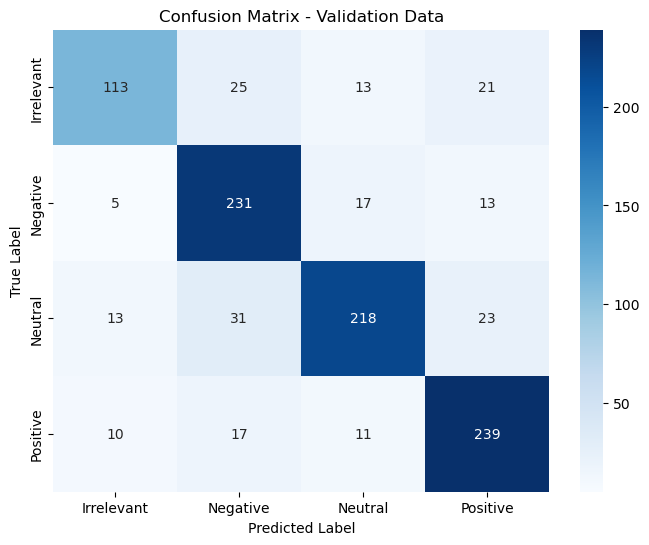

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_validation, y_pred_validation)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

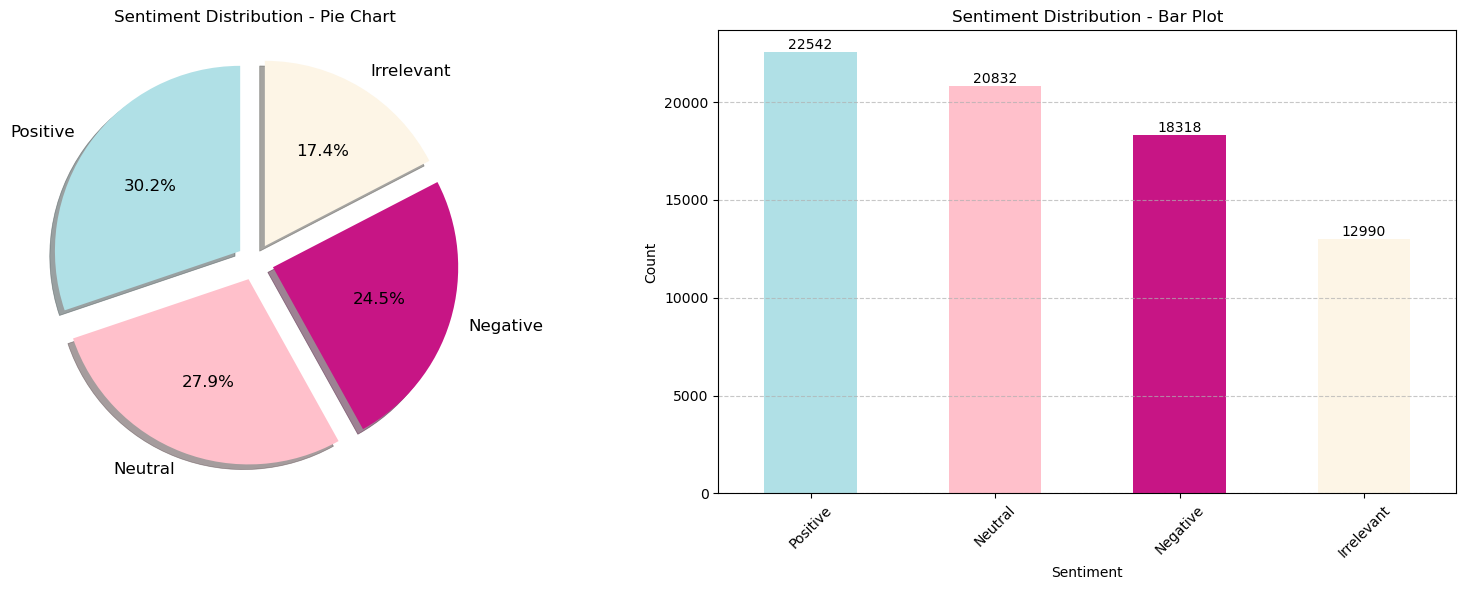

In [47]:
colors = ['powderblue', 'pink', 'mediumvioletred', 'oldlace']

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].pie(y_train.value_counts(), labels=y_train.unique(), autopct='%1.1f%%',
            startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12},
            explode=[0.1, 0.1, 0.1, 0.1], colors=colors, shadow=True)
axs[0].set_title('Sentiment Distribution - Pie Chart')

sentiment_counts = y_train.value_counts()
sentiment_counts.index = ['Positive', 'Neutral', 'Negative', 'Irrelevant']
axs[1] = sentiment_counts.plot(kind='bar', color=colors, ax=axs[1])
axs[1].set_title('Sentiment Distribution - Bar Plot')
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Pie Chart:
The pie chart provides a visual representation of the sentiment distribution within the Twitter dataset. The sentiment categories include "Positive," "Negative," "Neutral," and "Irrelevant." From the pie chart, it is evident that the majority of tweets fall into the "Positive" category, comprising approximately 30.2% of the dataset. This is followed by the "Neutral" category, accounting for around 27.9% of the dataset. The "Negative" category constitutes approximately 24.5% of the dataset, while the "Irrelevant" category accounts for the remaining 17.4%. This visualization highlights the balanced distribution of sentiments within the dataset, with a notable presence of neutral tweets.
___

#### Bar Plot:

The bar plot presents a more detailed breakdown of sentiment frequencies using bars of varying heights. Each sentiment category is represented by a colored bar, with the height of each bar indicating the count of tweets classified under that sentiment category. From the bar plot, it can be observed that the "Positive" sentiment category has the highest frequency, with approximately 22542 tweets. This is followed by the "Neutral" sentiment category, with around 20832 tweets. The "Negative" sentiment category has a slightly lower frequency, with approximately 18318 tweets. The "Irrelevant" sentiment category has the lowest frequency, with approximately 12990 tweets. This visualization provides a clearer picture of the absolute frequencies of each sentiment category, allowing for a more granular analysis of sentiment distribution within the dataset.

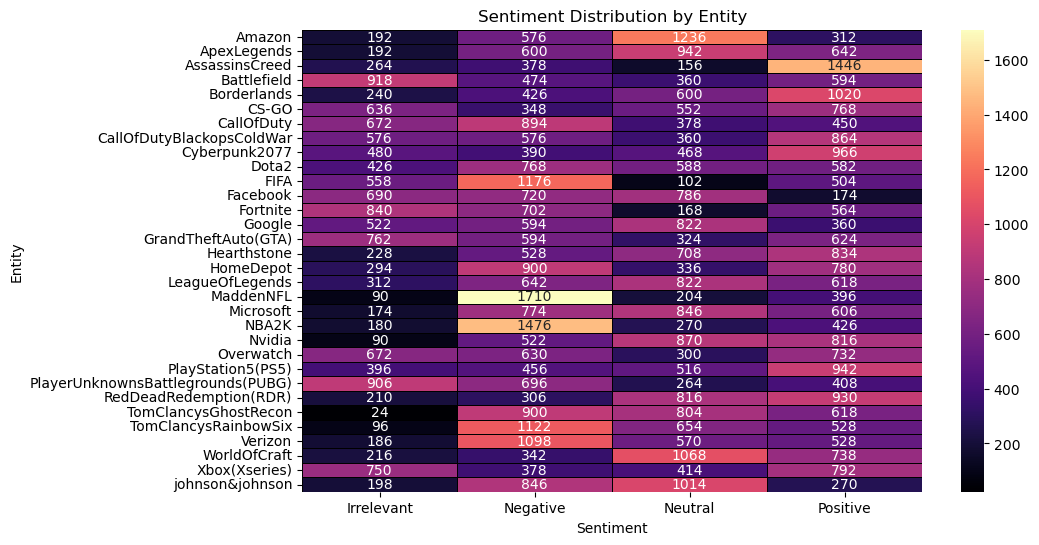

In [49]:
plt.figure(figsize=(10, 6))
count_table = pd.crosstab(index=train_df['entity'], columns=train_df['sentiment'])
sns.heatmap(count_table, cmap='magma', annot=True, fmt='d', linewidths=0.5, linecolor='black')
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()

### Sentiment Distribution Analysis by Entities

#### 1. Overall Sentiment Counts

- **Irrelevant:** The total count of irrelevant tweets across all entities is 12,990.
- **Negative:** The total count of negative tweets across all entities is 20,832.
- **Neutral:** The total count of neutral tweets across all entities is 18,318.
- **Positive:** The total count of positive tweets across all entities is 22,542.

___

#### 2. Entity-wise Sentiment Counts

Each Entity has a unique distribution of sentiment counts. For instance, "Amazon" has a higher count of neutral tweets, while "AssassinsCreed" has a significant number of positive tweets. This variation highlights the differing public opinions and engagement levels across different entities.

Here are a few entities with unusually high values in specific sentiment categories:

* AssassinsCreed: This entity has a significantly high count of positive tweets (1,446), indicating strong approval and positive engagement from its audience.
* FIFA: Exhibits a notably high count of negative tweets (1,176), suggesting significant dissatisfaction or criticism among its audience.
* MaddenNFL: Shows an exceptionally high count of negative tweets (1,710), indicating a high level of dissatisfaction or criticism.
* NBA2K: Also has a very high count of negative tweets (1,476), reflecting substantial dissatisfaction or criticism.
* WorldOfCraft: Has a high count of neutral tweets (1,068), indicating a balanced but somewhat indifferent public opinion.
* TomClancysRainbowSix: Displays a high count of negative tweets (1,122), suggesting significant dissatisfaction or criticism.

This variation in sentiment counts across entities highlights the differing public opinions and engagement levels. It provides valuable insights into how each branch is perceived by the public, which can inform targeted strategies for improving public relations and addressing specific issues.

___

#### 3. Average Sentiment Counts
- **Average Irrelevant:** Approximately 406 tweets per entity.
- **Average Negative:** Approximately 651 tweets per entity.
- **Average Neutral:** Approximately 572 tweets per entity.
- **Average Positive:** Approximately 704 tweets per entity.

___

#### 4. Sentiment Distribution Variation
- **Irrelevant:** The distribution of irrelevant tweets shows moderate variation across all entities.
- **Negative:** Negative tweets exhibit the highest variation, indicating significant differences in negative sentiment across all entities.
- **Neutral:** Neutral tweets have a moderate variation, suggesting a relatively consistent distribution.
- **Positive:** Positive tweets also show moderate variation, with some entities having significantly higher positive sentiment.

___

#### 5. Identify Dominant Sentiments
- **Negative Sentiment Dominance:** Entities like "MaddenNFL" and "NBA2K" have a dominant negative sentiment.
- **Positive Sentiment Dominance:** Entities such as "AssassinsCreed" and "Borderlands" have a dominant positive sentiment.
- **Neutral Sentiment Dominance:** Entities like "Amazon" and "WorldOfCraft" have a dominant neutral sentiment.
- **Irrelevant Sentiment Dominance:** Entities such as "Battlefield" and "PlayerUnknownsBattlegrounds(PUBG)" have a significant number of irrelevant tweets.

___

#### 6. Correlation Analysis

There are notable correlations between sentiment counts across different entities. For example, entities with high negative sentiment often have lower positive sentiment, indicating an inverse relationship. Conversely, entities with high neutral sentiment tend to have balanced distributions of other sentiments. 

To illustrate:

- **Negative vs. Positive Sentiment:** Entities like "MaddenNFL" and "NBA2K" exhibit high negative sentiment counts but relatively low positive sentiment counts, indicating a negative correlation between these two sentiments.
- **Neutral Sentiment Balance:** Entities with high neutral sentiment, such as "Amazon" and "WorldOfCraft," tend to have more balanced distributions of positive and negative sentiments, suggesting a neutral sentiment dominance with a moderate influence on overall sentiment distribution.

___

#### 7. Outlier Detection
- **High Sentiment Counts:** Entities like "NBA2K" and "MaddenNFL" have unusually high negative sentiment counts, making them outliers.
- **Low Sentiment Counts:** Entities such as "TomClancysGhostRecon" and "MaddenNFL" have unusually low counts in Irrelevant sentiment count, marking them as outliers.

___

### Conclusions
The analysis reveals significant variability in sentiment distribution across entities. Negative sentiment is the most variable, indicating differing levels of dissatisfaction or criticism among all entities. Positive and neutral sentiments are more evenly distributed but still show notable differences. Identifying dominant sentiments helps in understanding public opinion and engagement levels, while correlation analysis provides insights into the relationships between different sentiment categories. Outlier detection highlights entities with unusual sentiment patterns, which may warrant further investigation. Overall, this analysis provides a comprehensive understanding of sentiment distribution, aiding in strategic decision-making and public opinion management.

In [50]:
for sentiment in count_table.columns:
    min_entity = count_table[sentiment].idxmin()
    max_entity = count_table[sentiment].idxmax()
    min_val = count_table[sentiment].min()
    max_val = count_table[sentiment].max()
    print(f"Sentiment '{sentiment}':")
    print(f"  Minimum value '{min_val}' at Entity '{min_entity}'")
    print(f"  Maximum value '{max_val}' at Entity '{max_entity}'\n")

Sentiment 'Irrelevant':
  Minimum value '24' at Entity 'TomClancysGhostRecon'
  Maximum value '918' at Entity 'Battlefield'

Sentiment 'Negative':
  Minimum value '306' at Entity 'RedDeadRedemption(RDR)'
  Maximum value '1710' at Entity 'MaddenNFL'

Sentiment 'Neutral':
  Minimum value '102' at Entity 'FIFA'
  Maximum value '1236' at Entity 'Amazon'

Sentiment 'Positive':
  Minimum value '174' at Entity 'Facebook'
  Maximum value '1446' at Entity 'AssassinsCreed'



The provided sentiment distribution by branch reveals interesting insights into the sentiment trends within different Entities. 

___

- **Irrelevant Sentiment:** 

 The Enitity 'Battlefield' has the highest occurrence of the 'Irrelevant' sentiment, with 918 occurrences, while 'TomClancysGhostRecon' has the lowest occurrence with only 24. This suggests that discussions related to the 'Battlefield' may contain more irrelevant content compared to other Entities.
  
___

- **Negative Sentiment:** 

The Entity 'MaddenNFL' has the highest occurrence of the 'Negative' sentiment, with 1710 occurrences, indicating a higher level of dissatisfaction or negative sentiment associated with discussions related to Madden NFL. Conversely, 'RedDeadRedemption(RDR)' has the lowest occurrence of negative sentiment, with 306 occurrences.
 
___

- **Neutral Sentiment:** 

The Entity 'Amazon' exhibits the highest occurrence of the 'Neutral' sentiment, with 1236 occurrences, suggesting that discussions related to Amazon may contain a significant amount of neutral or non-opinionated content. On the other hand, 'FIFA' has the lowest occurrence of neutral sentiment, with 102 occurrences.
 
___

- **Positive Sentiment:** 

The Entity 'AssassinsCreed' stands out with the highest occurrence of the 'Positive' sentiment, with 1446 occurrences, indicating a predominantly positive sentiment associated with discussions related to Assassin's Creed. Meanwhile, the 'Facebook' has the lowest occurrence of positive sentiment, with 174 occurrences.
 
___

**Reasoning:**

The variation in sentiment distribution across different entities can be attributed to various factors such as brand perception, user engagement, and the nature of discussions within each entity. Factors like product quality, customer service, and brand reputation can influence sentiment trends, leading to differences in sentiment distribution across different entities. Additionally, user demographics, preferences, and cultural factors may also play a role in shaping sentiment patterns within specific entities.
Understanding these sentiment trends can help businesses and organizations gain valuable insights into customer perceptions, identify areas for improvement, and tailor their strategies to better meet customer needs and expectations.


In [33]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 1.9 MB/s eta 0:00:00a 0:00:01m


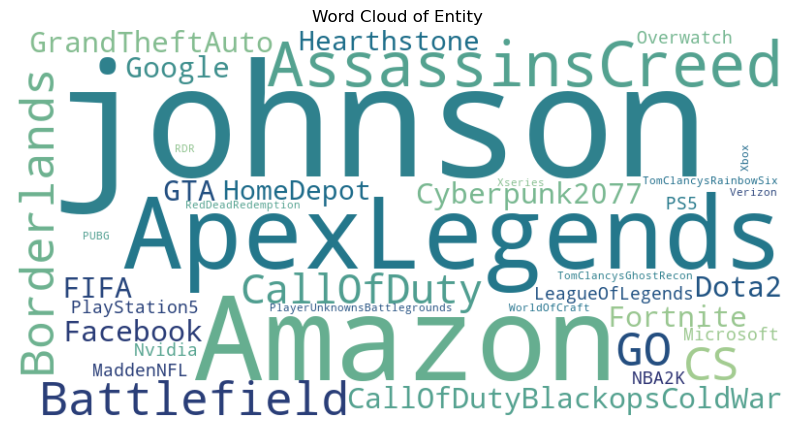

In [37]:
from wordcloud import WordCloud

entity_text = ' '.join(count_table.index)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='crest').generate(entity_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Entity')
plt.axis('off')
plt.show()

The word cloud of entities showcases a diverse range of frequently mentioned entities within the dataset, with notable prominence given to entities such as "Johnson," "Amazon," and various popular video game titles including "ApexLegends," "AssassinsCreed," and "Battlefield." This distribution suggests a rich tapestry of topics discussed, ranging from individuals to companies and entertainment media. The inclusion of prominent video game titles reflects a significant presence of gaming-related discussions, while mentions of retail giant "Amazon" and home improvement retailer "HomeDepot" hint at consumer experiences and preferences. Overall, the word cloud provides a snapshot of the dataset's content landscape, offering insights into prevalent themes and topics of interest among the text data.

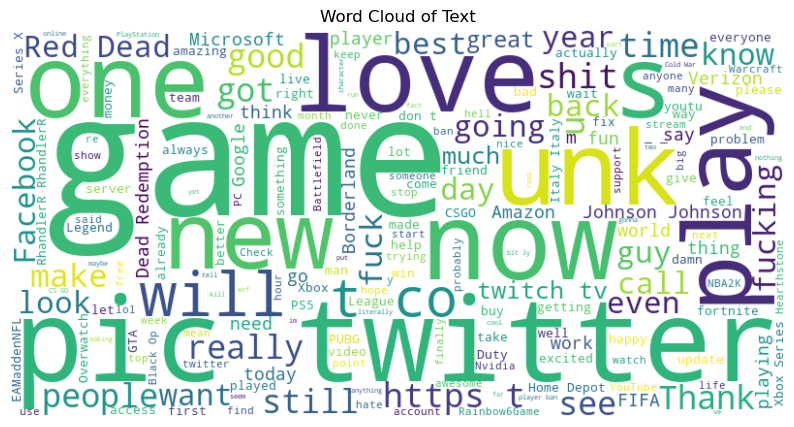

In [43]:
train_df['text'] = train_df['text'].astype(str)
validation_df['text'] = validation_df['text'].astype(str)

all_tweets_text = ' '.join(train_df['text']) + ' ' + ' '.join(validation_df['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Text')
plt.axis('off')
plt.show()

The word cloud of text reveals a diverse array of frequently occurring words within the dataset, with prominent mentions including "game," "twitter," "love," and "pic." These terms suggest a significant focus on discussions related to gaming, social media, and interpersonal emotions. The presence of words like "play," "new," and "now" indicates ongoing engagement with current activities and interests, while terms like "unknown" and "will" hint at elements of uncertainty or anticipation within the discourse. Additionally, the inclusion of more expressive terms such as "fucking" and "want" suggests a range of emotions and desires expressed in the text data. Overall, the word cloud provides a snapshot of prevalent themes and topics discussed within the dataset, offering insights into the content landscape and areas of focus among the text data.